In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/gtsdb

/content/drive/MyDrive/gtsdb


In [ ]:
!unzip data.zip

Archive:  data.zip
   creating: data/
   creating: data/images/
   creating: data/images/train/
  inflating: data/images/train/00000.jpg  
  inflating: data/images/train/00001.jpg  
  inflating: data/images/train/00002.jpg  
  inflating: data/images/train/00003.jpg  
  inflating: data/images/train/00004.jpg  
  inflating: data/images/train/00005.jpg  
  inflating: data/images/train/00007.jpg  
  inflating: data/images/train/00008.jpg  
  inflating: data/images/train/00009.jpg  
  inflating: data/images/train/00010.jpg  
  inflating: data/images/train/00011.jpg  
  inflating: data/images/train/00012.jpg  
  inflating: data/images/train/00013.jpg  
  inflating: data/images/train/00014.jpg  
  inflating: data/images/train/00015.jpg  
  inflating: data/images/train/00016.jpg  
  inflating: data/images/train/00017.jpg  
  inflating: data/images/train/00018.jpg  
  inflating: data/images/train/00019.jpg  
  inflating: data/images/train/00020.jpg  
  inflating: data/images/train/00021.jpg  
 

In [ ]:
!unzip test_imgs.zip

Archive:  test_imgs.zip
   creating: test_imgs/
  inflating: test_imgs/00000.jpg     
  inflating: test_imgs/00001.jpg     
  inflating: test_imgs/00002.jpg     
  inflating: test_imgs/00003.jpg     
  inflating: test_imgs/00004.jpg     
  inflating: test_imgs/00005.jpg     
  inflating: test_imgs/00006.jpg     
  inflating: test_imgs/00007.jpg     
  inflating: test_imgs/00008.jpg     
  inflating: test_imgs/00009.jpg     
  inflating: test_imgs/00010.jpg     
  inflating: test_imgs/00011.jpg     
  inflating: test_imgs/00012.jpg     
  inflating: test_imgs/00013.jpg     
  inflating: test_imgs/00014.jpg     
  inflating: test_imgs/00015.jpg     
  inflating: test_imgs/00016.jpg     
  inflating: test_imgs/00017.jpg     
  inflating: test_imgs/00018.jpg     
  inflating: test_imgs/00019.jpg     
  inflating: test_imgs/00020.jpg     
  inflating: test_imgs/00021.jpg     
  inflating: test_imgs/00022.jpg     
  inflating: test_imgs/00023.jpg     
  inflating: test_imgs/00024.jpg     
  

In [ ]:
import os
import matplotlib.pyplot as plt
import cv2
import random

In [ ]:
train_images_count= len(os.listdir("data/images/train"))
val_images_count= len(os.listdir("data/images/val"))
test_images_count= len(os.listdir("test_imgs"))
train_label_count= len(os.listdir("data/labels/train"))
val_label_count= len(os.listdir("data/labels/val"))

In [ ]:
print(f"Train Sayısı : {train_images_count}")
print(f"Val Sayısı : {val_images_count}")
print(f"Test Sayısı : {test_images_count}")
print(f"Train Label Sayısı : {train_label_count}")
print(f"Val Label Sayısı : {val_label_count}")

Train Sayısı : 480
Val Sayısı : 120
Test Sayısı : 300
Train Label Sayısı : 480
Val Label Sayısı : 120


In [ ]:
def show_imgs(image_dir, label_dir, count=5, figsize=(6, 6)):
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]
    selected_images = random.sample(image_files, count)

    for img_name in selected_images:
        img_path = os.path.join(image_dir, img_name)
        label_path = os.path.join(label_dir, img_name.replace(".jpg", ".txt"))

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        h, w = img.shape[:2]

        if os.path.exists(label_path):
            with open(label_path, "r") as f:
                for line in f:
                    cls, x, y, box_w, box_h = map(float, line.strip().split())
                    x1 = int((x - box_w / 2) * w)
                    y1 = int((y - box_h / 2) * h)
                    x2 = int((x + box_w / 2) * w)
                    y2 = int((y + box_h / 2) * h)
                    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
                    cv2.putText(img, str(int(cls)), (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 1)

        plt.figure(figsize=figsize)
        plt.imshow(img)
        plt.title(f"{img_name}")
        plt.axis("off")
        plt.show()

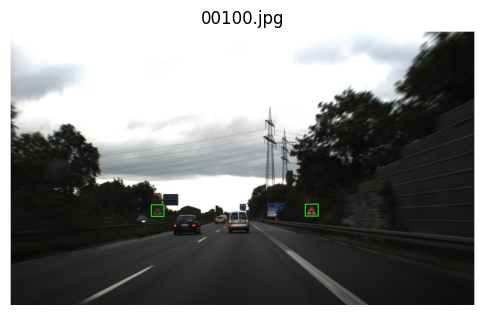

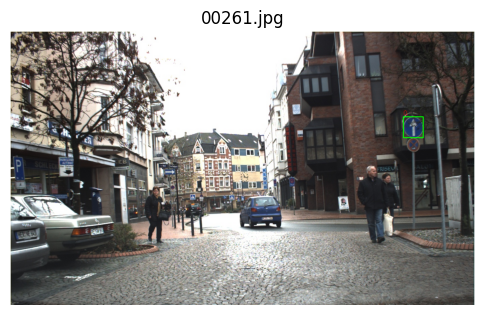

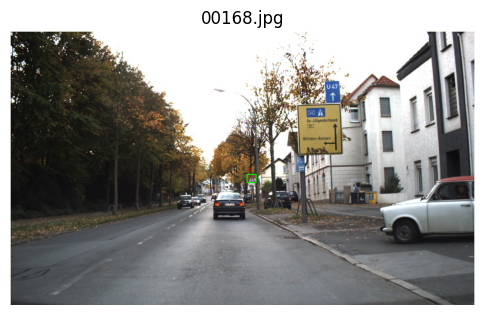

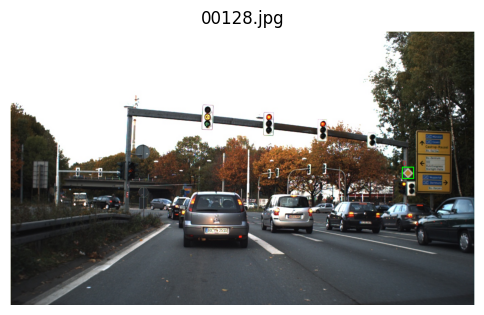

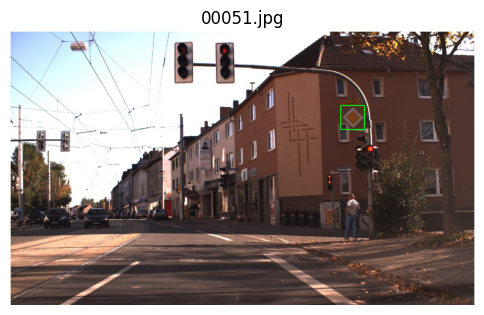

In [ ]:
show_imgs(image_dir="data/images/train", label_dir="data/labels/train", count=5)

Sınıflandırma için gtsrb ile eğittiğim modeli kullanacağım için yoloda tek yapacağım şey sadece levhanın yerini tespit etmesi o yüzden .yaml dosyasını ona göre düzenleyeceğim ve txt dosyalarında class id'ye sıfır *atayacağım*

In [ ]:
def convert_labels_to_single_class(label_dir):
    for filename in os.listdir(label_dir):
        if filename.endswith(".txt"):
            file_path = os.path.join(label_dir, filename)

            with open(file_path, "r") as f:
                lines = [line.strip() for line in f if line.strip()]

            if not lines:
                continue

            new_lines = []
            for line in lines:
                parts = line.split()
                if len(parts) == 5:
                    parts[0] = "0"
                    new_lines.append(" ".join(parts))

            with open(file_path, "w") as f:
                f.write("\n".join(new_lines))


In [ ]:
convert_labels_to_single_class("data/labels/train")
convert_labels_to_single_class("data/labels/val")

In [ ]:
%pip install Ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 97.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 112.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.7/112.6 GB disk)


In [ ]:
from ultralytics import YOLO
model = YOLO("yolov8m.pt")
results = model.train(data="gtsdb_yolo.yaml", epochs=100, imgsz=640, batch=32, name="yolov8_sign_detect")

Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=gtsdb_yolo.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8_sign_detect2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrain

100%|██████████| 755k/755k [00:00<00:00, 21.7MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

 18                  -1  2   1846272  ultralytics.nn.modules.block.C2f             [576, 384, 2]                 
 19                  -1  1   1327872  ultralytics.nn.modules.conv.Conv             [384, 384, 3, 2]              
 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 21                  -1  2   4207104  ultralytics.nn.modules.block.C2f             [960, 576, 2]                 
 22        [15, 18, 21]  1   3776275  ultralytics.nn.modules.head.Detect           [1, [192, 384, 576]]          
Model summary: 169 layers, 25,856,899 parameters, 25,856,883 gradients, 79.1 GFLOPs

Transferred 469/475 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 95.6MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.3±0.1 ms, read: 50.7±21.3 MB/s, size: 369.0 KB)


train: Scanning /content/drive/MyDrive/gtsdb/data/labels/train... 480 images, 72 backgrounds, 0 corrupt: 100%|██████████| 480/480 [03:21<00:00,  2.39it/s]

train: /content/drive/MyDrive/gtsdb/data/images/train/00340.jpg: 1 duplicate labels removed
train: New cache created: /content/drive/MyDrive/gtsdb/data/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 13.3±28.4 ms, read: 0.5±0.3 MB/s, size: 369.6 KB)


val: Scanning /content/drive/MyDrive/gtsdb/data/labels/val... 120 images, 22 backgrounds, 0 corrupt: 100%|██████████| 120/120 [01:07<00:00,  1.79it/s]

val: New cache created: /content/drive/MyDrive/gtsdb/data/labels/val.cache


Plotting labels to runs/detect/yolov8_sign_detect2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8_sign_detect2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      12.2G      1.264      4.585     0.9567         62        640: 100%|██████████| 15/15 [00:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.33s/it]

                   all        120        175     0.0312      0.829     0.0294     0.0203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      12.5G     0.9496     0.8886     0.8575         74        640: 100%|██████████| 15/15 [00:15<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all        120        175    0.00849      0.149    0.00423    0.00175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      12.1G      1.052     0.7458     0.8725         71        640: 100%|██████████| 15/15 [00:17<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all        120        175      0.107      0.554     0.0769     0.0521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      12.6G      1.005      0.692     0.8536         84        640: 100%|██████████| 15/15 [00:17<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all        120        175     0.0139      0.183    0.00472    0.00283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      12.6G     0.9717      0.726     0.8581         67        640: 100%|██████████| 15/15 [00:17<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all        120        175    0.00636     0.0229    0.00136     0.0008



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      12.2G     0.9764     0.7215      0.855         72        640: 100%|██████████| 15/15 [00:16<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all        120        175          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      12.6G     0.9917     0.6495     0.8415         83        640: 100%|██████████| 15/15 [00:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all        120        175          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      12.2G     0.9156     0.5995     0.8559         82        640: 100%|██████████| 15/15 [00:17<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all        120        175          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      12.5G     0.9966     0.6768     0.8548        100        640: 100%|██████████| 15/15 [00:17<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all        120        175    0.00122     0.0743   0.000657   0.000517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      12.2G     0.9594     0.6355     0.8447         64        640: 100%|██████████| 15/15 [00:17<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]

                   all        120        175       0.86      0.829      0.879      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      12.6G      0.931     0.6048      0.839        108        640: 100%|██████████| 15/15 [00:17<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]

                   all        120        175      0.937      0.903      0.944      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      12.2G     0.9149     0.5728     0.8522         77        640: 100%|██████████| 15/15 [00:16<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all        120        175      0.957      0.909      0.951      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      12.6G     0.9043     0.6143     0.8465         68        640: 100%|██████████| 15/15 [00:15<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.69it/s]

                   all        120        175      0.894       0.87      0.928      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      12.2G      0.878     0.5782     0.8281         86        640: 100%|██████████| 15/15 [00:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.69it/s]

                   all        120        175      0.679      0.863      0.694      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      12.5G     0.8611     0.5683     0.8376         79        640: 100%|██████████| 15/15 [00:17<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all        120        175      0.921      0.863      0.923      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      12.2G     0.8644     0.5289     0.8267         65        640: 100%|██████████| 15/15 [00:17<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all        120        175      0.783      0.906      0.803      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      12.1G     0.8634     0.5084     0.8301         66        640: 100%|██████████| 15/15 [00:18<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all        120        175      0.924      0.905      0.908      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      12.2G     0.8339     0.5002     0.8329         55        640: 100%|██████████| 15/15 [00:17<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all        120        175      0.948      0.891      0.925      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      12.5G     0.8314     0.5221     0.8283         84        640: 100%|██████████| 15/15 [00:17<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]

                   all        120        175      0.976      0.926      0.963      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      12.2G     0.8179     0.5172      0.827         94        640: 100%|██████████| 15/15 [00:17<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]

                   all        120        175      0.978       0.92      0.963      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      12.6G     0.7741     0.4859     0.8254         72        640: 100%|██████████| 15/15 [00:17<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all        120        175      0.971      0.947      0.977      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      12.2G     0.7882     0.4729     0.8219         62        640: 100%|██████████| 15/15 [00:17<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.28it/s]

                   all        120        175      0.981      0.937      0.972      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      12.5G     0.8014     0.4738     0.8269         79        640: 100%|██████████| 15/15 [00:20<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]

                   all        120        175      0.971      0.931      0.967      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      12.2G     0.7609     0.4459     0.8205         75        640: 100%|██████████| 15/15 [00:17<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

                   all        120        175      0.967      0.943      0.965       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      12.6G     0.7353     0.4288     0.8151         80        640: 100%|██████████| 15/15 [00:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all        120        175      0.947      0.931      0.964      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      12.2G     0.7471     0.4409     0.8185         88        640: 100%|██████████| 15/15 [00:16<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]

                   all        120        175      0.955      0.973      0.985      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      12.5G     0.7523     0.4451     0.8212         69        640: 100%|██████████| 15/15 [00:21<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all        120        175      0.965      0.952      0.976      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      12.2G     0.7606     0.4435     0.8194         77        640: 100%|██████████| 15/15 [00:17<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.29it/s]

                   all        120        175      0.994      0.949      0.979      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      12.6G     0.7401     0.4424     0.8118         89        640: 100%|██████████| 15/15 [00:16<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]

                   all        120        175      0.983      0.937      0.975      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      12.2G     0.7392      0.443     0.8179         65        640: 100%|██████████| 15/15 [00:17<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all        120        175      0.955      0.949      0.974      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      12.6G     0.7341     0.4297     0.8086         79        640: 100%|██████████| 15/15 [00:17<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all        120        175      0.982       0.94      0.983       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      12.2G     0.7344     0.4154     0.8207         64        640: 100%|██████████| 15/15 [00:16<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]

                   all        120        175      0.977      0.959      0.983      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      12.6G     0.7453     0.4418     0.8201         96        640: 100%|██████████| 15/15 [00:17<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]

                   all        120        175      0.982      0.941       0.98      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      12.2G     0.6896     0.4261     0.8138         91        640: 100%|██████████| 15/15 [00:17<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all        120        175      0.955      0.971      0.985      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      12.6G     0.6798     0.4013     0.8097         76        640: 100%|██████████| 15/15 [00:17<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all        120        175      0.961      0.943      0.974      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      12.2G      0.719     0.4244     0.8114         80        640: 100%|██████████| 15/15 [00:16<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all        120        175      0.979      0.949      0.977      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      12.6G     0.6919     0.3969     0.8006         86        640: 100%|██████████| 15/15 [00:17<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all        120        175      0.953      0.954       0.98      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      12.2G      0.679     0.3853     0.7979         74        640: 100%|██████████| 15/15 [00:17<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]

                   all        120        175      0.971      0.977      0.986      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      12.5G     0.6872     0.4012     0.8159         62        640: 100%|██████████| 15/15 [00:17<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

                   all        120        175      0.983      0.965      0.988      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      12.2G     0.6713     0.3825     0.8091         78        640: 100%|██████████| 15/15 [00:16<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all        120        175      0.988      0.946       0.98      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      12.5G     0.6726     0.3964     0.8059         84        640: 100%|██████████| 15/15 [00:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all        120        175      0.976      0.946      0.978      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      12.2G     0.6658     0.3946     0.7967         78        640: 100%|██████████| 15/15 [00:17<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s]

                   all        120        175      0.975      0.954      0.977      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      12.5G     0.6481     0.3779     0.8033         74        640: 100%|██████████| 15/15 [00:17<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all        120        175      0.976      0.954      0.979      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      12.2G     0.6469     0.3597     0.8119         81        640: 100%|██████████| 15/15 [00:22<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all        120        175      0.988      0.952      0.985      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      12.6G     0.6627     0.3626     0.8007         73        640: 100%|██████████| 15/15 [00:16<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.03it/s]

                   all        120        175      0.988      0.947      0.973      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      12.2G     0.6549     0.3484     0.8005         80        640: 100%|██████████| 15/15 [00:17<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all        120        175      0.982      0.959       0.97      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      12.5G     0.6615     0.3708      0.799         81        640: 100%|██████████| 15/15 [00:16<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all        120        175      0.988      0.965      0.982      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      12.2G     0.6378     0.3818     0.8024         78        640: 100%|██████████| 15/15 [00:17<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all        120        175      0.972      0.966      0.977      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      12.5G     0.6671     0.3873     0.8099         88        640: 100%|██████████| 15/15 [00:17<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]

                   all        120        175      0.978       0.96      0.981       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      12.2G     0.6296     0.3544      0.804         97        640: 100%|██████████| 15/15 [00:19<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]

                   all        120        175      0.982      0.949      0.973      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      12.6G     0.6439     0.3628     0.8026         74        640: 100%|██████████| 15/15 [00:17<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all        120        175       0.97      0.971      0.976      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      12.3G     0.6059     0.3566     0.7942         63        640: 100%|██████████| 15/15 [00:17<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]

                   all        120        175       0.96      0.964      0.977      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      12.6G     0.6171     0.3482     0.8094         83        640: 100%|██████████| 15/15 [00:19<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all        120        175      0.975       0.96      0.982      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      12.2G     0.6351     0.3461     0.8019         74        640: 100%|██████████| 15/15 [00:17<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.28it/s]

                   all        120        175      0.974      0.971      0.987      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      12.5G     0.5927     0.3281     0.7918         84        640: 100%|██████████| 15/15 [00:17<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all        120        175      0.984       0.96      0.984      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      12.2G     0.5679     0.3194     0.7853         77        640: 100%|██████████| 15/15 [00:16<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all        120        175      0.983      0.965      0.983      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      12.6G      0.614     0.3503     0.7945         85        640: 100%|██████████| 15/15 [00:17<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.03it/s]

                   all        120        175      0.982       0.96      0.984      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      12.2G     0.5831       0.33     0.7962         68        640: 100%|██████████| 15/15 [00:17<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all        120        175      0.989      0.949       0.99       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      12.6G     0.6244     0.3458     0.8043         64        640: 100%|██████████| 15/15 [00:16<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]

                   all        120        175      0.977      0.966      0.986      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      12.2G     0.6142     0.3404     0.7995         84        640: 100%|██████████| 15/15 [00:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all        120        175      0.988       0.97      0.985      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      12.6G     0.6066     0.3358     0.7944         74        640: 100%|██████████| 15/15 [00:17<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all        120        175      0.969      0.954      0.982      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      12.2G     0.5802     0.3214     0.7873         56        640: 100%|██████████| 15/15 [00:17<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]

                   all        120        175      0.971      0.958      0.984      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      12.5G     0.5759     0.3208     0.7941         81        640: 100%|██████████| 15/15 [00:16<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

                   all        120        175      0.994      0.939      0.977      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      12.2G     0.5966     0.3341     0.7849         91        640: 100%|██████████| 15/15 [00:17<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all        120        175      0.987      0.966      0.987      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      12.1G     0.5836     0.3264     0.8007         70        640: 100%|██████████| 15/15 [00:17<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all        120        175      0.983      0.965      0.986      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      12.2G     0.5602     0.3089     0.7926         52        640: 100%|██████████| 15/15 [00:21<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.02s/it]

                   all        120        175      0.976       0.96       0.99      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      12.5G     0.5276     0.3013     0.7894         73        640: 100%|██████████| 15/15 [00:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all        120        175      0.976      0.966      0.988      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      12.2G     0.5364     0.3095     0.7954         66        640: 100%|██████████| 15/15 [00:17<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all        120        175       0.97       0.96      0.985      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      12.5G     0.5633     0.3182     0.7959         57        640: 100%|██████████| 15/15 [00:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all        120        175      0.975      0.954      0.983      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      12.2G     0.5504     0.3065     0.7972         87        640: 100%|██████████| 15/15 [00:16<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all        120        175      0.971       0.97      0.985      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      12.6G     0.5443     0.3057     0.7904         62        640: 100%|██████████| 15/15 [00:17<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all        120        175      0.982      0.955      0.988       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      12.2G     0.5378     0.3051     0.7937         80        640: 100%|██████████| 15/15 [00:20<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all        120        175      0.977      0.971       0.99      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      12.5G     0.5433     0.3008     0.8002         76        640: 100%|██████████| 15/15 [00:17<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.02s/it]

                   all        120        175      0.981      0.971      0.988      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      12.2G     0.5401     0.2989     0.7817         66        640: 100%|██████████| 15/15 [00:17<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]

                   all        120        175      0.983      0.966      0.982      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      12.6G     0.5172     0.2849     0.7931         78        640: 100%|██████████| 15/15 [00:17<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s]

                   all        120        175      0.981      0.966      0.986      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      12.2G      0.516     0.2856     0.7958         70        640: 100%|██████████| 15/15 [00:17<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all        120        175      0.972      0.975      0.989      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      12.5G     0.5308     0.2945     0.7933         80        640: 100%|██████████| 15/15 [00:17<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]

                   all        120        175      0.981      0.977      0.991       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      12.2G     0.5062     0.2833     0.7815         82        640: 100%|██████████| 15/15 [00:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all        120        175      0.981      0.966       0.99      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      12.1G     0.5401     0.2916     0.7841         95        640: 100%|██████████| 15/15 [00:17<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]

                   all        120        175      0.994      0.971      0.992       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      12.2G     0.5229     0.2899     0.7815         81        640: 100%|██████████| 15/15 [00:17<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all        120        175      0.988      0.971      0.987      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      12.6G     0.5028     0.2817      0.792         66        640: 100%|██████████| 15/15 [00:17<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all        120        175      0.965      0.977      0.985      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      12.2G     0.4971     0.2795     0.7815         90        640: 100%|██████████| 15/15 [00:17<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.29it/s]

                   all        120        175      0.977       0.97      0.987      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      12.6G     0.4991     0.2808      0.787         89        640: 100%|██████████| 15/15 [00:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all        120        175      0.988       0.97      0.986      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      12.2G     0.5134     0.2847     0.7824         73        640: 100%|██████████| 15/15 [00:17<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

                   all        120        175      0.981      0.977      0.986       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      12.6G     0.5023     0.2777     0.7843         65        640: 100%|██████████| 15/15 [00:17<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all        120        175      0.988      0.971      0.989      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      12.2G     0.4956      0.281     0.7715         96        640: 100%|██████████| 15/15 [00:16<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]

                   all        120        175      0.993       0.96      0.988      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      12.5G     0.4902     0.2661     0.7852         70        640: 100%|██████████| 15/15 [00:17<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all        120        175      0.992       0.96       0.99      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      12.2G     0.4806     0.2712     0.7764         67        640: 100%|██████████| 15/15 [00:16<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.00s/it]

                   all        120        175      0.993       0.96      0.992      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      12.6G     0.4628     0.2505     0.7897         80        640: 100%|██████████| 15/15 [00:17<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all        120        175      0.972      0.981      0.992      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      12.2G     0.4545     0.2552     0.7794         73        640: 100%|██████████| 15/15 [00:19<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s]

                   all        120        175      0.982      0.971      0.992      0.866


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      12.5G     0.4316     0.2404     0.7832         45        640: 100%|██████████| 15/15 [00:20<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all        120        175      0.985      0.977      0.991      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      12.2G     0.4612     0.2506     0.7858         51        640: 100%|██████████| 15/15 [00:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

                   all        120        175      0.983      0.964       0.99      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      12.5G     0.4482     0.2558     0.7774         49        640: 100%|██████████| 15/15 [00:16<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.16it/s]

                   all        120        175      0.986       0.96      0.986      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      12.2G      0.434     0.2477     0.7767         41        640: 100%|██████████| 15/15 [00:14<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.69it/s]

                   all        120        175       0.99       0.96      0.988      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      12.5G     0.4312      0.248     0.7759         39        640: 100%|██████████| 15/15 [00:17<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all        120        175      0.994       0.96      0.991      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      12.2G     0.4261     0.2414     0.7741         44        640: 100%|██████████| 15/15 [00:17<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.29it/s]

                   all        120        175      0.994      0.964      0.991      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      12.5G      0.438     0.2436     0.7825         46        640: 100%|██████████| 15/15 [00:16<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all        120        175      0.994      0.966      0.992      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      12.2G     0.4134     0.2359     0.7836         34        640: 100%|██████████| 15/15 [00:17<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all        120        175      0.993      0.966      0.992      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      12.1G     0.4446      0.252     0.7719         42        640: 100%|██████████| 15/15 [00:17<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all        120        175      0.994      0.964      0.992      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      12.2G     0.4104     0.2208     0.7812         51        640: 100%|██████████| 15/15 [00:16<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all        120        175      0.977      0.971      0.992      0.866



100 epochs completed in 0.614 hours.
Optimizer stripped from runs/detect/yolov8_sign_detect2/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/yolov8_sign_detect2/weights/best.pt, 52.0MB

Validating runs/detect/yolov8_sign_detect2/weights/best.pt...
Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]


                   all        120        175      0.972      0.981      0.992      0.866
Speed: 0.1ms preprocess, 7.1ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/yolov8_sign_detect2
